In [56]:
library(pacman)

# Use pacman to load the packages
p_load(car)
p_load(dplyr)
p_load(tidyverse, VIM, mice, Hmisc, 
               DMwR, naniar)
p_load(stargazer)
p_load(openxlsx)
p_load(here)
p_load(rio)
p_load(ggplot2)
p_load(BSDA)
p_load(corrplot)
p_load(caTools)
p_load(keras)
p_load(reticulate)
p_load(readr)
p_load(writexl)


In [28]:
library(caTools)

In [8]:
py_install("tensorflow")

+ "C:/Users/angme/anaconda3/condabin/conda.bat" "install" "--yes" "--prefix" "C:/Users/angme/anaconda3" "-c" "conda-forge" "tensorflow"



Import File

In [12]:
data = read.csv(here("dataSources", "videoGames", "video game sales titles - amc.csv"))
attach(data)

In [13]:
# Check the data
str(data)
summary(data)
names(data)
head(data, 5)

'data.frame':	7623 obs. of  23 variables:
 $ Rank          : int  2 3 5 7 8 10 13 18 19 23 ...
 $ Title         : chr  "Mario Kart 8 Deluxe" "Animal Crossing: New Horizons" "Counter-Strike: Global Offensive" "PLAYERUNKNOWN'S BATTLEGROUNDS" ...
 $ Console       : chr  "NS" "NS" "PC" "PC" ...
 $ Publisher     : chr  "Nintendo" "Nintendo" "Valve" "PUBG Corporation" ...
 $ Developer     : chr  "Nintendo EPD" "Nintendo" "Valve Corporation" "PUBG Corporation" ...
 $ Genre         : chr  "Racing" "Simulation" "Shooter" "Shooter" ...
 $ ReleaseYear   : int  2017 2020 2012 2017 2010 2018 2017 2017 2019 2011 ...
 $ ReleaseQuarter: int  2 1 3 4 4 3 1 4 4 2 ...
 $ ReleaseMonth  : int  4 3 8 12 10 7 3 10 11 5 ...
 $ ReleaseWeek   : int  17 12 34 51 41 28 9 43 46 21 ...
 $ ReleaseDay    : int  6 6 3 5 3 5 6 6 6 2 ...
 $ ReleaseWeekend: chr  "Weekend" "Weekend" "Weekday" "Weekday" ...
 $ EndOfMonth    : chr  "End of month" "End of month" "End of month" "End of month" ...
 $ TotalSales    : int  55460

      Rank          Title             Console           Publisher        
 Min.   :    2   Length:7623        Length:7623        Length:7623       
 1st Qu.: 5416   Class :character   Class :character   Class :character  
 Median :11084   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10574                                                           
 3rd Qu.:15858                                                           
 Max.   :19944                                                           
                                                                         
  Developer            Genre            ReleaseYear   ReleaseQuarter 
 Length:7623        Length:7623        Min.   :2010   Min.   :1.000  
 Class :character   Class :character   1st Qu.:2011   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2013   Median :3.000  
                                       Mean   :2014   Mean   :2.558  
                                       3rd Qu.:2016   3rd 

[1] "Rank"           "Title"          "Console"        "Publisher"     
 [5] "Developer"      "Genre"          "ReleaseYear"    "ReleaseQuarter"
 [9] "ReleaseMonth"   "ReleaseWeek"    "ReleaseDay"     "ReleaseWeekend"
[13] "EndOfMonth"     "TotalSales"     "NASales"        "PALSales"      
[17] "JapanSales"     "OtherSales"     "ReleaseDate"    "LastUpdate"    
[21] "VGChartzScore"  "CriticScore"    "UserScore"

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,⋯,TotalSales,NASales,PALSales,JapanSales,OtherSales,ReleaseDate,LastUpdate,VGChartzScore,CriticScore,UserScore
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,⋯,55460000,NA,NA,NA,NA,28/4/2017,11/19/2018,NA,9.3,NA
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,⋯,42790000,NA,NA,NA,NA,20/3/2020,4/11/2020,8.0,NA,NA
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,⋯,40000000,NA,NA,NA,NA,21/8/2012,3/26/2019,NA,NA,NA
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,⋯,36600000,NA,NA,NA,NA,21/12/2017,4/29/2019,NA,NA,NA
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,⋯,33150000,NA,NA,NA,NA,5/10/2010,8/5/2018,8.8,10.0,NA


In [14]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Console = as.factor(Console),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    Genre = as.factor(Genre),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth)
  )

data ['NASales'] = NULL
data ['PALSales'] = NULL
data ['JapanSales'] = NULL
data ['OtherSales'] = NULL
data ['ReleaseDate'] = NULL
data ['LastUpdate'] = NULL
data ['VGChartzScore'] = NULL
data ['CriticScore'] = NULL
data ['UserScore'] = NULL

In [15]:
head(data, 5)

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,6,Weekend,End of month,55460000
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,6,Weekend,End of month,42790000
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,3,Weekday,End of month,40000000
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,5,Weekday,End of month,36600000
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,3,Weekday,Beginning of month,33150000


In [9]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Noticed too many publishers (total 713 publishers) & developers (total 1564 developers)

Rank          Title        Console      Publisher      Developer 
          7623           4930             21            713           1564 
         Genre    ReleaseYear ReleaseQuarter   ReleaseMonth    ReleaseWeek 
            13             14              4             12             53 
    ReleaseDay ReleaseWeekend     EndOfMonth     TotalSales 
             7              2              2            500

ANOVA test - Do Publisher & Developer have any significant impact on the sales revenue?
Note: Due to large amount of publishers & developers, we run one-way ANOVA test in order to minimize computing power required

In [16]:
########################################################
# Does Publisher have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Publisher" column
data$Publisher <- gsub("-", "_", data$Publisher)

In [11]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Publisher = aov(TotalSales ~ Publisher,data=data)
summary(anova.result_Publisher)

# p-value is less than 0.05, reject the null hypothesis - Publisher has an impact on the revenue

              Df    Sum Sq   Mean Sq F value Pr(>F)    
Publisher    712 7.141e+15 1.003e+13   3.075 <2e-16 ***
Residuals   6910 2.254e+16 3.262e+12                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
# Apply the Tukey HSD test
tukey_result = TukeyHSD(anova.result_Publisher)

In [13]:
# Change Tukey HSD test result to data frame
tukey_df <- as.data.frame(tukey_result$Publisher)

In [14]:
# Create a new column for Publisher names
tukey_df$Publisher <- rownames(tukey_df)

In [15]:
# View the dataframe
head(tukey_df,5)
names(tukey_df)

,diff,lwr,upr,p adj,Publisher
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
17_Bit-11 bit studios,-224000.0,-10295814,9847814,1,17_Bit-11 bit studios
1C Company-11 bit studios,-267333.3,-6981876,6447209,1,1C Company-11 bit studios
2K Games-11 bit studios,462400.0,-3784250,4709050,1,2K Games-11 bit studios
2K Play-11 bit studios,-119000.0,-5013022,4775022,1,2K Play-11 bit studios
2K Sports-11 bit studios,568911.4,-3671014,4808836,1,2K Sports-11 bit studios


[1] "diff"      "lwr"       "upr"       "p adj"     "Publisher"

In [16]:
# filter for p value < 0.05
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.05)


In [17]:
# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


In [18]:
# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

# Compare and replace data$Publisher with 'Others' if it's not in the list
data$Publisher <- ifelse(data$Publisher %in% all_significant_publishers, data$Publisher, 'Others')


[1] 394

In [19]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Publisher to 395

Rank          Title        Console      Publisher      Developer 
          7623           4930             21            395           1564 
         Genre    ReleaseYear ReleaseQuarter   ReleaseMonth    ReleaseWeek 
            13             14              4             12             53 
    ReleaseDay ReleaseWeekend     EndOfMonth     TotalSales 
             7              2              2            500

In [20]:
########################################################
# Try again using lower significance level

# filter for p value < 0.00025
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.00025)

# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

# Compare and replace data$Publisher with 'Others' if it's not in the list
data$Publisher <- ifelse(data$Publisher %in% all_significant_publishers, data$Publisher, 'Others')


[1] 335

In [21]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Publisher to 336

Rank          Title        Console      Publisher      Developer 
          7623           4930             21            336           1564 
         Genre    ReleaseYear ReleaseQuarter   ReleaseMonth    ReleaseWeek 
            13             14              4             12             53 
    ReleaseDay ReleaseWeekend     EndOfMonth     TotalSales 
             7              2              2            500

In [17]:
########################################################
# Does Developer have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Developer" column
data$Developer <- gsub("-", "_", data$Developer)

In [23]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Developer = aov(TotalSales ~ Developer,data=data)
summary(anova.result_Developer)

# p-value is less than 0.05, reject the null hypothesis - Developer has an impact on the revenue


              Df    Sum Sq   Mean Sq F value Pr(>F)    
Developer   1563 1.422e+16 9.096e+12   3.564 <2e-16 ***
Residuals   6059 1.546e+16 2.552e+12                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [24]:
# Apply the Tukey HSD test
tukey_result_Developer = TukeyHSD(anova.result_Developer)

In [25]:
# Change Tukey HSD test result to data frame
tukey_df_Developer <- as.data.frame(tukey_result_Developer$Developer)

# Create a new column for Developer names
tukey_df_Developer$Developer <- rownames(tukey_df_Developer)

In [26]:
# filter for p value < 0.00025
significant_tukey_df_Developer <- tukey_df_Developer %>%
  filter(`p adj` < 0.00025)

In [27]:
# Split the "Developer" column into two columns
significant_tukey_df_Developer <- significant_tukey_df_Developer %>%
  separate(Developer, into = c("Developer1", "Developer2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant developers
all_significant_developers <- unique(significant_tukey_df_Developer$Developer1)

# Remove NAs (if any)
all_significant_developers <- all_significant_developers[!is.na(all_significant_developers)]
length (all_significant_developers)

[1] 1061

In [28]:
# Compare and replace data$Developer with 'Others' if it's not in the list
data$Developer <- ifelse(data$Developer %in% all_significant_developers, data$Developer, 'Others')


In [29]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Reduce the number of unique Developer to 1062

Rank          Title        Console      Publisher      Developer 
          7623           4930             21            336           1062 
         Genre    ReleaseYear ReleaseQuarter   ReleaseMonth    ReleaseWeek 
            13             14              4             12             53 
    ReleaseDay ReleaseWeekend     EndOfMonth     TotalSales 
             7              2              2            500

In [30]:
########################################################
###### Examine missing patterns

# Count the number of records where Status is "Unknown"
print( sum(data$Developer == "Unknown"))

[1] 401


In [31]:
# Spotted 401 'Unknown' developer, which is the Top 1! Need to do data imputation
print (401/7623)
# 5.26% unknown

[1] 0.05260396


,Rank,Title,Console,Publisher,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,Developer,
7222,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
401,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,0,0,0,0,401,401


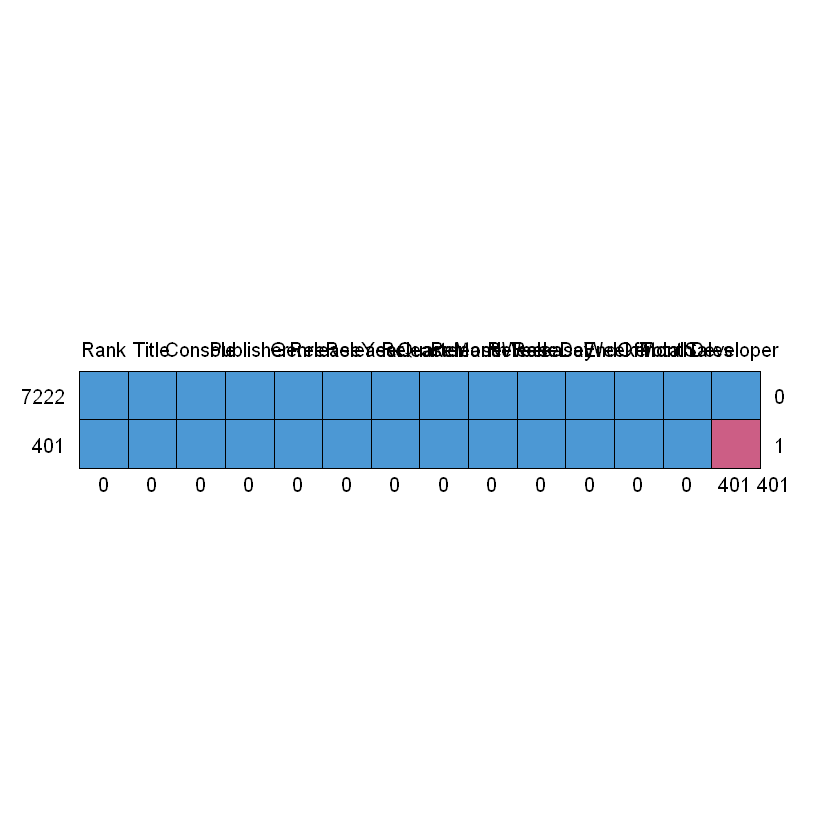

In [18]:
# Replace 'Unknown' with NA
data$Developer[data$Developer == 'Unknown'] <- NA

md.pattern(data)

In [111]:
##### Little's Test #######
# Little's (1988) test statistic to assess if data is MCAR. 
# The null hypothesis (H0) : the data is MCAR

mcar_test(data)

statistic,df,p.value,missing.patterns
<dbl>,<dbl>,<dbl>,<int>
404.9237,13,0,2


In [19]:
# p-value is less than 0.05, reject null hypothesis = data is not missing at random; 
# hence we are unable to perform data imputation to prevent systematic error
# drop those records with Unknown Developer

data = na.omit(data)

In [20]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Data left with 7222 records

Rank          Title        Console      Publisher      Developer 
          7222           4613             21            674           1563 
         Genre    ReleaseYear ReleaseQuarter   ReleaseMonth    ReleaseWeek 
            13             14              4             12             53 
    ReleaseDay ReleaseWeekend     EndOfMonth     TotalSales 
             7              2              2            499

Build LM model

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


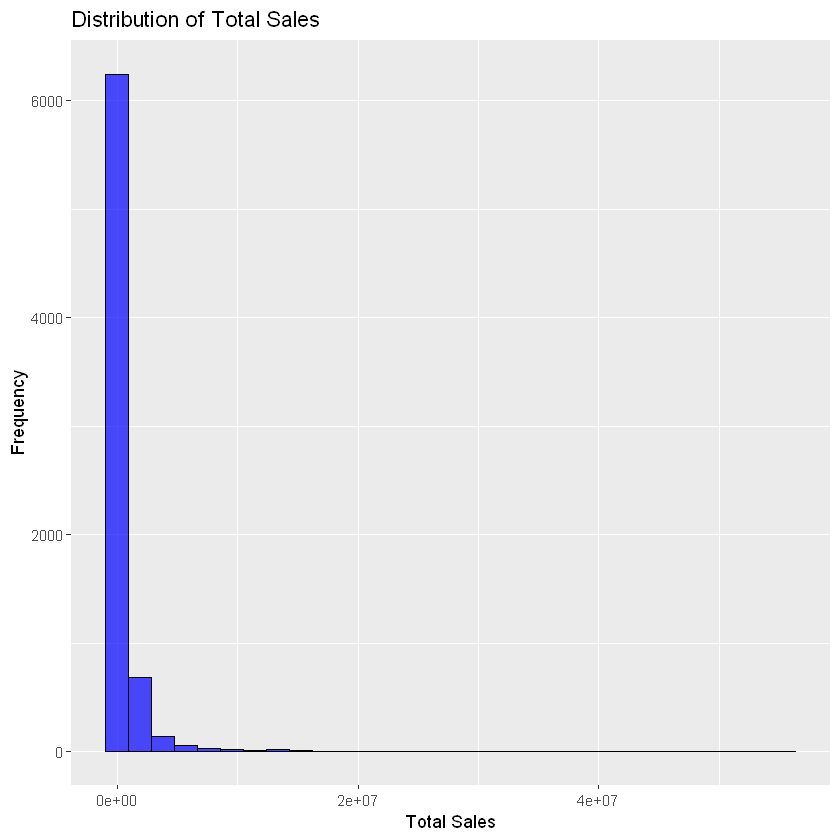

In [35]:
########################################################
# Check the distribution of dependent variable (TotalSales)

# Create a histogram using ggplot
ggplot(data, aes(x = data$TotalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Total Sales",
    x = "Total Sales",
    y = "Frequency"
  )

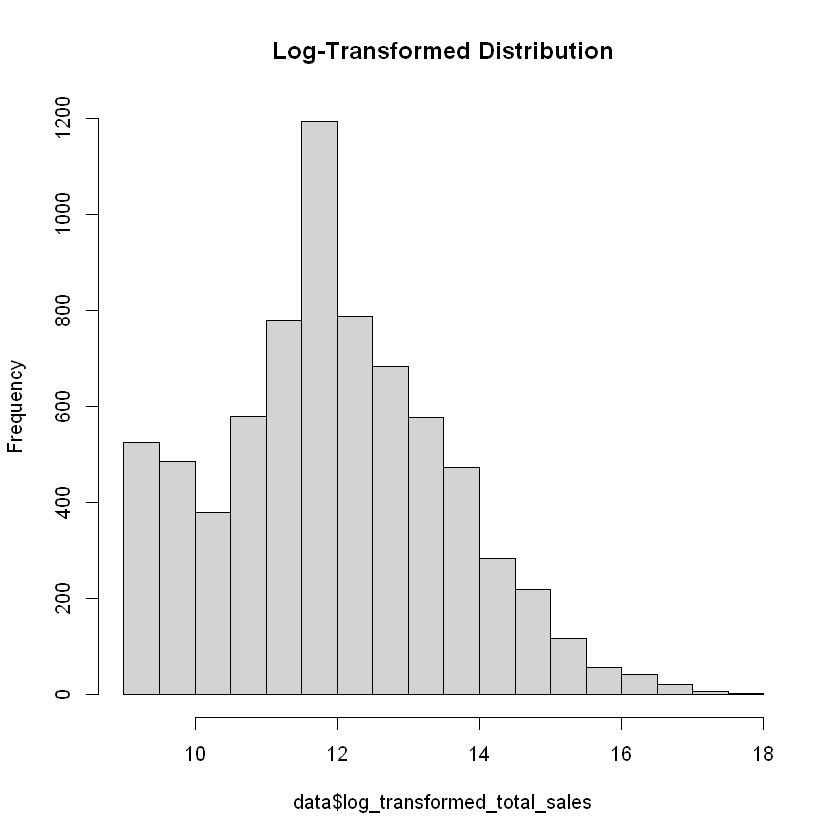

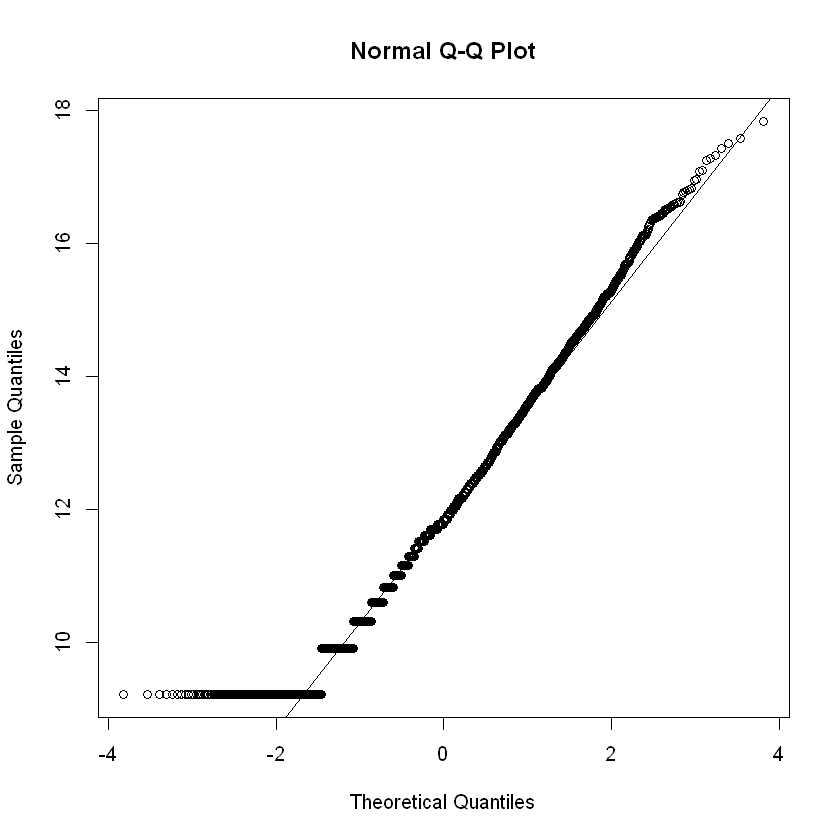

In [34]:
# Right-skewed : to transform y using log

# Apply a log transformation to the 'y' variable
data$log_transformed_total_sales <- log(data$TotalSales)

# Check the histogram of the log-transformed 'y' variable
hist(data$log_transformed_total_sales, main = "Log-Transformed Distribution")

# Check the Q-Q plot to assess normality
qqnorm(data$log_transformed_total_sales)
qqline(data$log_transformed_total_sales)

In [47]:
########################################################
# Build LM model

lm_model1 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseQuarter + ReleaseWeekend, data = data)
summary(lm_model1)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseQuarter + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9285 -0.7331  0.0000  0.7566  4.1412 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                     16.03138    1.26822  12.641
ConsoleAmig                                      1.55033    1.26806   1.223
ConsoleDS                                        0.11604    0.08058   1.440
ConsoleGBA                                       2.13504    1.27184   1.679
ConsoleiOS                                       1.31235    1.26718   1.036
ConsoleNS                                        0.23039    0.09450   2.438
ConsolePC                                        0.47850    0.07340   6.519
ConsolePS2                                      -0.26151    0.19835  -1.318
ConsolePS3                                       0.70734    0.07437   9.512


In [48]:
# Set max.print to Infinity to ensure all coefficients are displayed
options(max.print = 9999999)

# Print the summary using stargazer
stargazer(lm_model1, type = "text", out = "summary_table.txt")


                                                    Dependent variable:    
                                                ---------------------------
                                                log_transformed_total_sales
---------------------------------------------------------------------------
ConsoleAmig                                                1.550           
                                                          (1.268)          
                                                                           
ConsoleDS                                                  0.116           
                                                          (0.081)          
                                                                           
ConsoleGBA                                                2.135*           
                                                          (1.272)          
                                                                           
ConsoleiOS 

In [ ]:
# R2 is only 40%; Adj R2 is 36.9%
# All X variables are significant as p-values are less than 0.05

In [49]:
########################################################
# Build LM model

lm_model2 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseMonth + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model2)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseWeekend + EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9432 -0.7349  0.0000  0.7585  4.1466 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     16.100321   1.268747  12.690
ConsoleAmig                                      1.538692   1.268364   1.213
ConsoleDS                                        0.116117   0.080590   1.441
ConsoleGBA                                       2.140326   1.272080   1.683
ConsoleiOS                                       1.274515   1.267551   1.005
ConsoleNS                                        0.236481   0.094530   2.502
ConsolePC                                        0.481109   0.073439   6.551
ConsolePS2                                      -0.261390   0.198388  -1.318
ConsolePS3                                       0.71038

In [ ]:
# R2 is only 40%; Adj R2 is 36.9%
# All X variables are significant except for EndOfMonth

In [50]:
########################################################
# Build LM model

lm_model3 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseWeek + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model3)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseWeek + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9004 -0.7395  0.0000  0.7346  4.2607 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     16.486087   1.261203  13.072
ConsoleAmig                                      1.366275   1.260547   1.084
ConsoleDS                                        0.120466   0.080069   1.505
ConsoleGBA                                       2.344433   1.264286   1.854
ConsoleiOS                                       1.607082   1.259824   1.276
ConsoleNS                                        0.227591   0.093903   2.424
ConsolePC                                        0.471946   0.072983   6.466
ConsolePS2                                      -0.207397   0.197222  -1.052
ConsolePS3                                       0.706538

In [ ]:
# R2 is only 40.78%; Adj R2 is 37.7%
# All X variables are significant except for EndOfMonth

In [51]:
########################################################
# Build LM model

lm_model4 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model4)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9087 -0.7397  0.0000  0.7337  4.2571 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     16.490220   1.261186  13.075
ConsoleAmig                                      1.358535   1.260490   1.078
ConsoleDS                                        0.121089   0.080075   1.512
ConsoleGBA                                       2.349020   1.264259   1.858
ConsoleiOS                                       1.605031   1.259830   1.274
ConsoleNS                                        0.227160   0.093905   2.419
ConsolePC                                        0.471836   0.072981   6.465
ConsolePS2                                      -0.206637   0.197227  -1.048
ConsolePS3                                       0.70697

In [52]:
########################################################
# Build LM model

lm_model5 = lm(log_transformed_total_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model5)


Call:
lm(formula = log_transformed_total_sales ~ Console + Developer + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1686 -0.6361  0.0000  0.6648  5.8685 

Coefficients: (1 not defined because of singularities)
                                                                Estimate
(Intercept)                                                   14.2555325
ConsoleAmig                                                   -0.8667865
ConsoleDS                                                      0.0794361
ConsoleGBA                                                     0.9250647
ConsoleiOS                                                     1.2671182
ConsoleNS                                                      0.0680676
ConsolePC                                                      0.1940569
ConsolePS2                                                    -0.3203189
ConsolePS3                                         

In [ ]:
# R2 increase to 48.63%; Adj R2 up slightly to 39.45%
# All X variables are significant except for Console

In [53]:
########################################################
# Build LM model

lm_model6 = lm(log_transformed_total_sales ~ Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)
summary(lm_model6)


Call:
lm(formula = log_transformed_total_sales ~ Developer + Genre + 
    ReleaseMonth + ReleaseDay + ReleaseWeekend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1950 -0.6652  0.0000  0.6670  5.7347 

Coefficients:
                                                               Estimate
(Intercept)                                                   14.554733
DeveloperBig Ant Studios                                      -3.429801
DeveloperCapcom                                               -2.060807
DeveloperCD Projekt Red Studio                                 0.571975
DeveloperChunSoft                                             -2.491961
DeveloperCity Interactive                                     -2.212559
DeveloperCodemasters                                          -1.922182
DeveloperCodemasters Birmingham                               -1.426283
DeveloperCompile Heart                                        -3.152662
DeveloperCreative Assembly             

In [ ]:
# Removing Console made R2 to drop slightly from 48.63% to 46.91%; Adj R2 from 39.45% to 37.62%
# The model is still not good enough to be used to predict sales revenue (less than 50%)

Warning message in abline(lm_model6, col = "red"):
"only using the first two of 1076 regression coefficients"


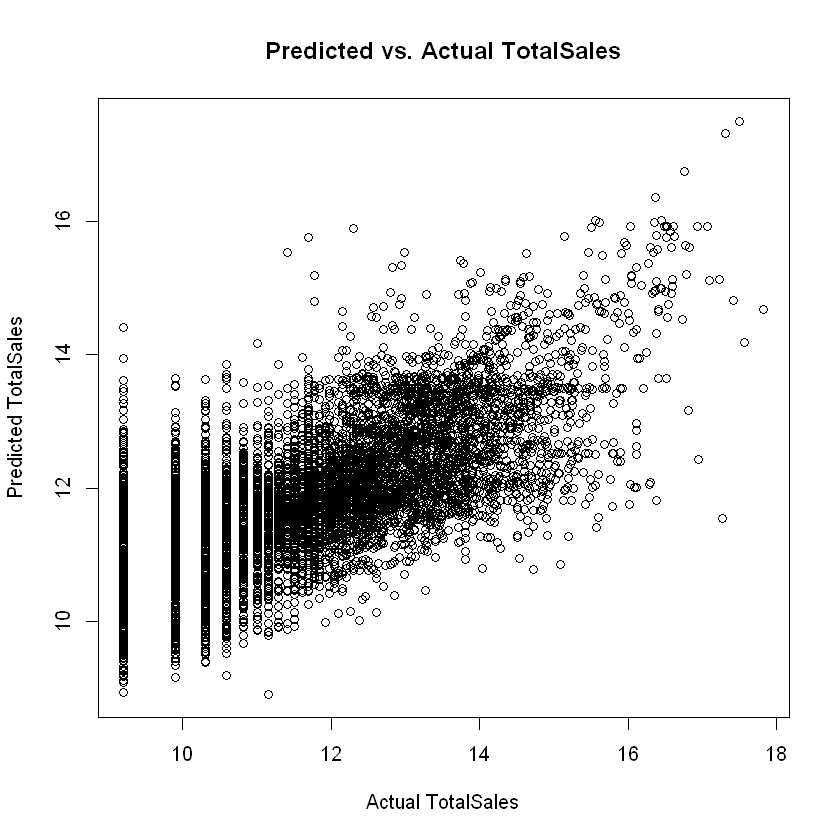

In [56]:
# Make predictions using the lm model
predicted_values <- predict(lm_model6, data)

# Create a scatterplot to compare predicted vs actual TotalSales
plot(data$log_transformed_total_sales, predicted_values, main = "Predicted vs. Actual TotalSales", 
     xlab = "Actual TotalSales", ylab = "Predicted TotalSales")

# Add the fitted line from the lm model
abline(lm_model6, col = "red")

Try splitting the dataset - and evaluate the errors

In [59]:
########################################################
# Build LM model - split into 70-30 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (70%) and a test set (30%)
split <- sample.split(data$log_transformed_total_sales, SplitRatio = 0.7)
training_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Fit a linear regression (lm) model to the training set
lm_model7 = lm(log_transformed_total_sales ~ Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data)
summary(lm_model7)



Call:
lm(formula = log_transformed_total_sales ~ Developer + Genre + 
    ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9080 -0.6568  0.0000  0.6550  5.8062 

Coefficients:
                                                               Estimate
(Intercept)                                                   15.405618
DeveloperBig Ant Studios                                      -4.234070
DeveloperCapcom                                               -2.821600
DeveloperCD Projekt Red Studio                                 0.317540
DeveloperChunSoft                                             -3.239906
DeveloperCity Interactive                                     -3.032090
DeveloperCodemasters                                          -2.702335
DeveloperCodemasters Birmingham                               -2.302260
DeveloperCompile Heart                                        -4.160857
DeveloperCreative Assembly    

In [60]:
# Make predictions on the test set
predicted_values <- predict(lm_model7, newdata = test_data)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Developer has new levels GameMill Publishing, Gaslamp Games, Genki, Giga, Global A Entertainment, Glyphic Entertainment, Grimlore Games, Grip Games, Guerrilla Cambridge, h.a.n.d. Inc., Hack Berry, Harukaze, Haydee Interactive, Hazelight, Headup Games, Home Entertainment Suppliers, Hourences, Humble Hearts, Hyde, Igrodelsky, iiWin, Impulse Gear, iNiS, Intense, Jupiter Multimedia, K2 LLC, Karin Entertainment, Koch Media, Kogado Studio, Inc., Konami Computer Entertainment Japan, Krillbite Studio, Kyle Seeley, Lamina Studios, Level 5/Brownie Brown, LightBox Interactive, Little Green Men Games, Ludosity AB, LVGameDev LLC, Marvelous / Imageepoch, Masque Publishing, Mass Media, Mehsoft, Metanet Software Inc., Microsoft Game Studios, Might and Delight, Miracle Positive, Miwashiba, Mobilero, Monumental Games, MTO, Murudai, Naked Sky, Namco Bandai Games America, Neognosis, New World Interactive, NEXT Studios, Nintendo SDD, Nintendo SPD Production Group 1/Team Ninja, Noise Inc., Norbert Palacz, Nordic Games Publishing, NorthPole Studio, Northway Games, Nude Maker, Nuked Games, Nvizzio Creations, Ondrej Angelovic, Opus Studio, OutOfTime, Overhype Studios, Panic Button LLC, ParityBit, Peace, Pine Studio, Piranha Games, Pixel Crow, Playsport Games, Polykid, Power of 2, Powerhead, LLC, Powerhoof, PowPow, Priority Interrupt, Proletariat Inc., Pugstorm Game Studios, Pyramid/JAPAN Studio, Q Entertainment / Phantagram / FeelPlus, Q_Games, QCF Design, Qute Corporation, Racing Bros, Radical Entertainment, RailSimulator.com, Ravenscourt, React Games, Real Dynamics, RedLynx, Ltd., Reloaded Productions, Ricotta, RIZ Inc., Rockfish Games, Rubycone Games, Ruffian Games, Runic Games, Sam Barlow, Sarbakan, SCEA Bend Studio, SCEE Cambridge, SCEI, Scholastic Inc., Sean Han Tani, Secret Exit Ltd., Sega CS3, Serious Brew, ShadowRage, Shin'en Multimedia, Skipmore, Slak Games, Sony Marketing, Sparkworkz, Square, stillalive studios, Strawdogs Studios Limited, Studio Pixel, Sunight Games, Supergonk, Sushi Typhoon Games, SVG Distribution, Swing Swing Submarine, Synnergy Circle Games, Taito Corporation, TEAM HORAY, Team Ramrod, Team Tachyon, Technos Japan Corporation, Tectonic Studios, Teku Studios, Terry Cavanagh, Tetris Online, Inc, thatgamecompany, The Method, The Mustard Corporation, The Workshop, Torn Banner Studios, Tri Synergy, Tryfirst, Tubby Games, Uber Entertainment, Ubisoft Pune, Ubisoft Shanghai, Untold Games, Visual Impact Productions, VSTEP, Wadjet Eye Games, Wales Interactive Ltd., Wargaming West, Wargaming.net, Weappy Studio, WeirdBeard, What Pumpkin Games, Inc., Will Co., Ltd. Noisycroak, Winged Cloud, Xing Inc., ZeroBit Games, Zoë Mode, Zoo Entertainment Inc.


In [ ]:
## Unable to predict due to developer not covered in the training dataset
# Need to simplify the developer further

Explore grouping Publisher & Developer into Top 25 based on sales revenue

In [37]:
########################################################
# Explore grouping Publisher & Developer into Top 25 based on sales revenue

# Sort the data frame by TotalSales in descending order
data_v2 <- data[order(-data$TotalSales), ]

# Extract the top 25 publishers and developers
top_publishers <- head(unique(data_v2$Publisher), 25)
top_developers <- head(unique(data_v2$Developer), 25)

# View the top 25
print(top_publishers)
print(top_developers)

 [1] "Nintendo"                              
 [2] "Valve"                                 
 [3] "PUBG Corporation"                      
 [4] "Mojang"                                
 [5] "Re_Logic"                              
 [6] "Rockstar Games"                        
 [7] "Sony Interactive Entertainment"        
 [8] "Warner Bros. Interactive Entertainment"
 [9] "Activision"                            
[10] "Microsoft Studios"                     
[11] "Chucklefish"                           
[12] "Blizzard Entertainment"                
[13] "Sony Computer Entertainment"           
[14] "EA Sports"                             
[15] "Electronic Arts"                       
[16] "Ubisoft"                               
[17] "Coffee Stain Publishing"               
[18] "Microsoft Game Studios"                
[19] "Facepunch Studios"                     
[20] "Bethesda Softworks"                    
[21] "Sony Computer Entertainment America"   
[22] "2K Games"                   

In [38]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names[!names %in% top_names] <- "Others"
  return(names)
}

# Replace publishers and developers in the original data frame
data_v2$Publisher <- replace_with_others(data_v2$Publisher, top_publishers)
data_v2$Developer <- replace_with_others(data_v2$Developer, top_developers)


In [39]:
########################################################
# Check the number of distinct values for the variables

sapply(data_v2, function(x) n_distinct(x))

Rank                       Title 
                       7222                        4613 
                    Console                   Publisher 
                         21                          26 
                  Developer                       Genre 
                         26                          13 
                ReleaseYear              ReleaseQuarter 
                         14                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                         499 
log_transformed_total_sales 
                        499

In [40]:
data_v2 = data_v2 %>%
    mutate (
        Publisher = as.factor(Publisher),
        Developer = as.factor(Developer),
        TotalSales = as.numeric(TotalSales)
    )

In [41]:
str(data_v2)

'data.frame':	7222 obs. of  15 variables:
 $ Rank                       : int  2 3 5 7 8 10 13 18 19 23 ...
 $ Title                      : chr  "Mario Kart 8 Deluxe" "Animal Crossing: New Horizons" "Counter-Strike: Global Offensive" "PLAYERUNKNOWN'S BATTLEGROUNDS" ...
 $ Console                    : Factor w/ 21 levels "3DS","Amig","DS",..: 6 6 7 7 7 6 6 6 6 7 ...
 $ Publisher                  : Factor w/ 26 levels "2K Games","Activision",..: 16 16 25 18 15 16 16 16 16 19 ...
 $ Developer                  : Factor w/ 26 levels "Bandai Namco Games",..: 16 12 25 18 9 1 16 16 5 19 ...
 $ Genre                      : Factor w/ 13 levels "Action","Action-Adventure",..: 8 11 10 10 5 4 2 6 9 6 ...
 $ ReleaseYear                : int  2017 2020 2012 2017 2010 2018 2017 2017 2019 2011 ...
 $ ReleaseQuarter             : int  2 1 3 4 4 3 1 4 4 2 ...
 $ ReleaseMonth               : int  4 3 8 12 10 7 3 10 11 5 ...
 $ ReleaseWeek                : int  17 12 34 51 41 28 9 43 46 21 ...
 $ ReleaseDa

In [42]:
########################################################
# Build LM model - split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(525)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data_v2$log_transformed_total_sales, SplitRatio = 0.8 )
training_data_v2 <- subset(data_v2, split == TRUE)
test_data_v2 <- subset(data_v2, split == FALSE)

In [110]:
# Fit a linear regression (lm) model to the training set
lm_model8 = lm(log_transformed_total_sales ~ Console + Publisher + Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)
summary(lm_model8)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, 
    data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1442 -0.8353  0.0040  0.8273  4.2905 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                     19.148432   1.386051  13.815
ConsoleAmig                                      1.569314   1.318796   1.190
ConsoleDS                                        0.147745   0.087099   1.696
ConsoleGBA                                       2.108939   1.316536   1.602
ConsoleiOS                                       0.833043   1.340707   0.621
ConsoleNS                                       -0.109025   0.105908  -1.029
ConsolePC                                        0.551602   0.078384   7.037
ConsolePS2                                      -0.513180   0.2

In [ ]:
# R2 drops to 35.41%; Adj R2 drop slightly to 34.49%
# All X variables are significant

In [91]:
# Fit a linear regression (lm) model to the training set
lm_model9 = lm(log_transformed_total_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)
summary(lm_model9)


Call:
lm(formula = log_transformed_total_sales ~ Console + Developer + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0987 -0.9211 -0.0292  0.9301  5.9127 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           15.150134   0.465623  32.537  < 2e-16 ***
ConsoleAmig                            1.210960   1.420590   0.852 0.394008    
ConsoleDS                             -0.056563   0.092240  -0.613 0.539759    
ConsoleGBA                             1.721346   1.418092   1.214 0.224856    
ConsoleiOS                             0.950506   1.444313   0.658 0.510499    
ConsoleNS                             -0.188055   0.113484  -1.657 0.097552 .  
ConsolePC                              0.305727   0.081273   3.762 0.000170 ***
ConsolePS2                            -0.737913   0.253089  -2.916 0.003563 ** 
ConsolePS3       

In [92]:
# Fit a linear regression (lm) model to the training set
lm_model10 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)
summary(lm_model10)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0580 -0.8579 -0.0098  0.8399  4.5918 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     16.543761   1.351659  12.240
ConsoleAmig                                      1.641402   1.350490   1.215
ConsoleDS                                        0.160598   0.089079   1.803
ConsoleGBA                                       2.074811   1.348156   1.539
ConsoleiOS                                       1.418145   1.350599   1.050
ConsoleNS                                       -0.016158   0.106597  -0.152
ConsolePC                                        0.592085   0.080070   7.395
ConsolePS2                                      -0.502337   0.241608  -2.079
ConsolePS3                                  

In [93]:
# Make predictions on the test set using log-transformed data
predicted_log_values <- predict(lm_model8, newdata = test_data_v2)

# Convert log-transformed predictions back to the original scale
predicted_values <- exp(predicted_log_values)


Warning message in predict.lm(lm_model8, newdata = test_data_v2):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


In [95]:
# Calculate various error metrics on the original scale
errors <- test_data_v2$TotalSales - predicted_values
sum_of_errors <- sum(errors)
mean_absolute_deviation <- mean(abs(errors))
mean_percentage_error <- mean(errors) * 100  # Already on the original scale
mean_squared_error <- mean(errors^2)
standard_error <- sqrt(mean_squared_error)
mean_absolute_percentage_error <- mean(abs(errors)) * 100

# Print the error metrics
cat("Sum of Errors:", sum_of_errors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")

Sum of Errors: 130605420 
Mean Absolute Deviation: 289702.2 
Mean Percentage Error: 9450465 %
Mean Squared Error: 695715199956 
Standard Error: 834095.4 
Mean Absolute Percentage Error: 28970217 %


The lm model's performance is not that great - to explore using NN

In [43]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 64, input_shape = c(12), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [44]:
summary (model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 64)                      832         
 dense_2 (Dense)                    (None, 32)                      2080        
 dense_1 (Dense)                    (None, 16)                      528         
 dense_3 (Dense)                    (None, 1)                       17          
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
________________________________________________________________________________


In [45]:
# Exclude specified columns by selecting all columns except the ones to be excluded
x_train <- training_data_v2[, !names(training_data_v2) %in% c("log_transformed_total_sales", "Rank", "Title")]
x_test <- test_data_v2[, !names(test_data_v2) %in% c("log_transformed_total_sales", "Rank", "Title")]

In [46]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data_v2$TotalSales), epochs = 100, batch_size = 100, verbose = 1)

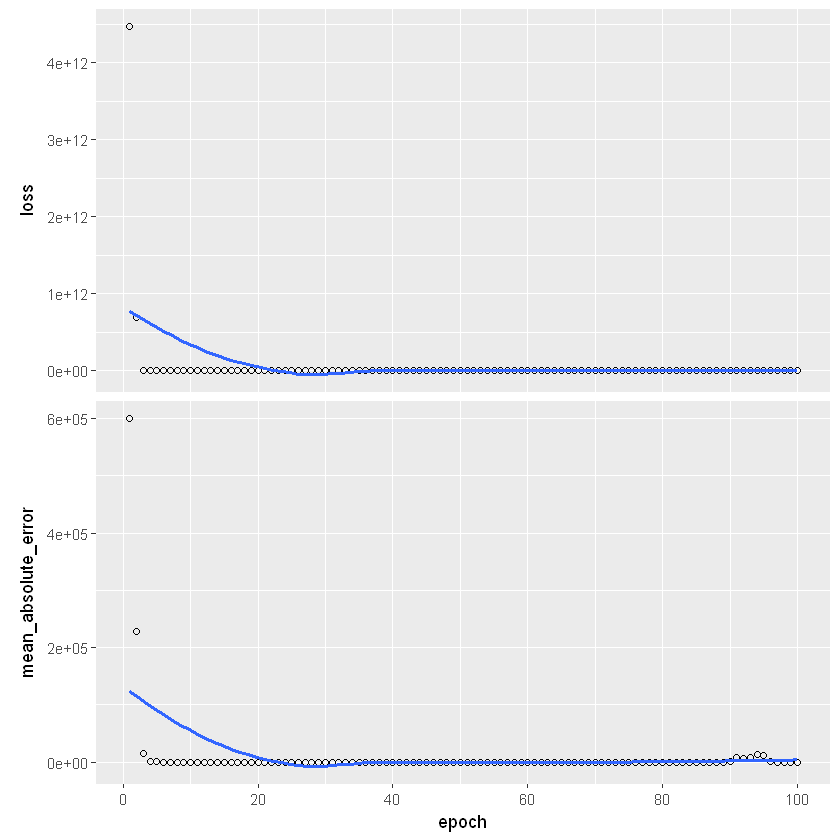

In [47]:
plot(history)

In [48]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$TotalSales)  # Target variable for testing
)

In [49]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
         3134.06470            51.08364 


In [123]:
# LM Model: Mean Squared Error: 695715199956  & Mean Absolute Deviation: 289702.2 
# NN Model: loss: 3134 & mean_absolute_error: 51.08
# NN Model is of better predictor!

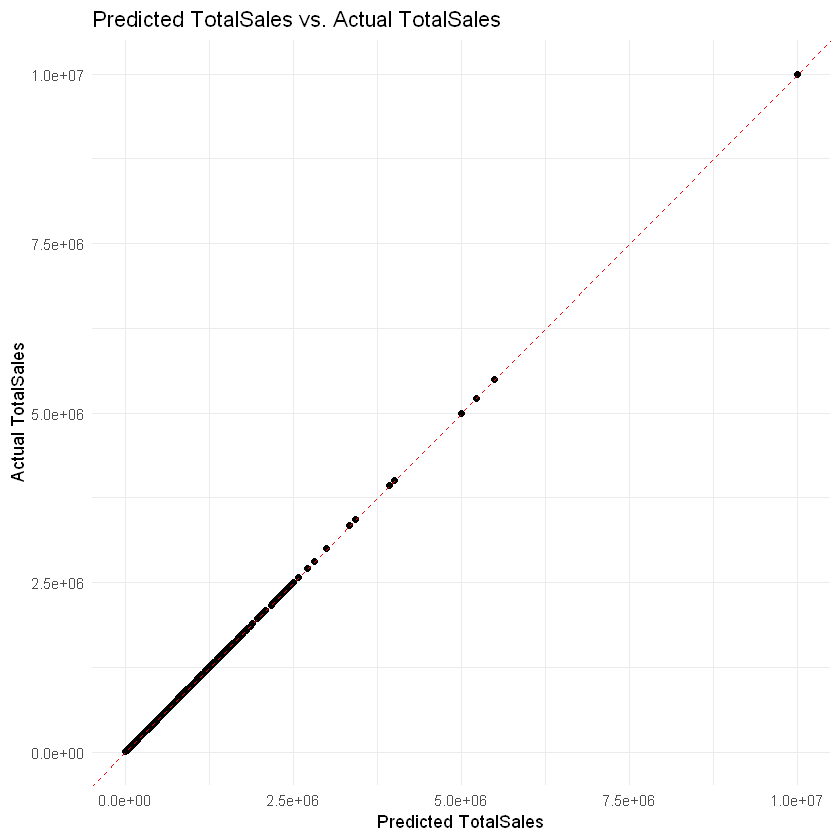

In [50]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_test))

# Organize results into a data frame
results <- data.frame(Actual_TotalSales = test_data_v2$TotalSales, Predicted_TotalSales = as.vector(predictions))

# Create the scatter plot
ggplot(results, aes(x = Predicted_TotalSales, y = Actual_TotalSales)) +
  geom_point() +
  labs(x = "Predicted TotalSales", y = "Actual TotalSales") +
  ggtitle("Predicted TotalSales vs. Actual TotalSales") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  theme_minimal()

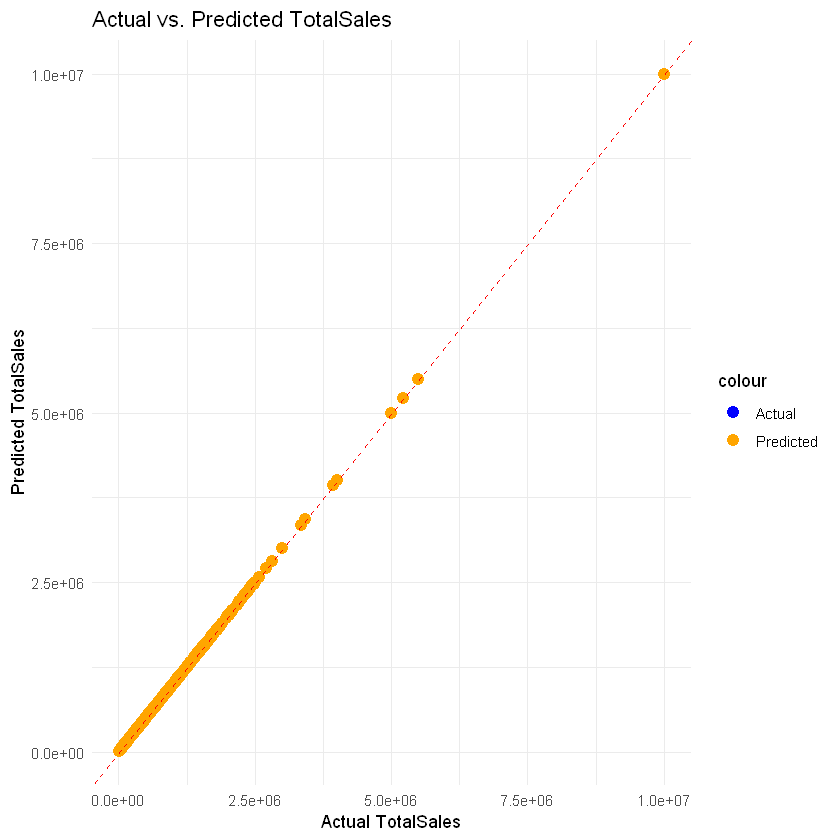

In [51]:
# Create a scatter plot with different colors for actual and predicted
ggplot(results, aes(x = Actual_TotalSales, y = Predicted_TotalSales)) +
  geom_point(aes(color = "Actual"), size = 3) +
  geom_point(aes(color = "Predicted"), size = 3) +
  scale_color_manual(values = c("Actual" = "blue", "Predicted" = "orange")) +
  labs(x = "Actual TotalSales", y = "Predicted TotalSales") +
  ggtitle("Actual vs. Predicted TotalSales") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  theme_minimal()

In [ ]:
# Export to excel

write_xlsx(my_data, path = "output_file.xlsx")

In [131]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model2 <- keras_model_sequential()

# Add an input layer
model2 %>% 
  layer_dense(units = 72, input_shape = c(12), activation = "relu")

# Add one or more hidden layers
model2 %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 8, activation = "relu")

# Add an output layer
model2 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model2 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [136]:
summary(model2)

Model: "sequential_4"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_16 (Dense)                   (None, 72)                      936         
 dense_18 (Dense)                   (None, 50)                      3650        
 dense_17 (Dense)                   (None, 8)                       408         
 dense_19 (Dense)                   (None, 1)                       9           
Total params: 5,003
Trainable params: 5,003
Non-trainable params: 0
________________________________________________________________________________


In [139]:
# Train the model
history2 = keras::fit(model2, data.matrix(x_train), data.matrix(training_data_v2$TotalSales), epochs = 100, batch_size = 100, verbose = 1)

In [133]:
# Evaluate the model
eval_metrics2 <- model2 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$TotalSales)  # Target variable for testing
)

In [134]:
# Print the evaluation metrics
print(eval_metrics2)

               loss mean_absolute_error 
         6980.16016            83.23783 


In [ ]:
# Increasing the hyperparameter doesn't help to improve the model's performance

In [137]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model3 <- keras_model_sequential()

# Add an input layer
model3 %>% 
  layer_dense(units = 64, input_shape = c(12), activation = "relu")

# Add one or more hidden layers
model3 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model3 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model3 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [146]:
# Train the model
history3 = keras::fit(model3, data.matrix(x_train), data.matrix(training_data_v2$TotalSales), epochs = 500, batch_size = 100, verbose = 1)

In [147]:
# Evaluate the model
eval_metrics3 <- model3 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$TotalSales)  # Target variable for testing
)

In [148]:
# Print the evaluation metrics
print(eval_metrics3)

               loss mean_absolute_error 
       29526070.000            2646.132 


In [ ]:
# Increasing number of iterations does not help with the model's performance too
# Probably overfitting

In [52]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model4 <- keras_model_sequential()

# Add an input layer
model4 %>% 
  layer_dense(units = 64, input_shape = c(12), activation = "relu")

# Add one or more hidden layers
model4 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model4 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model4 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [53]:
# Train the model
history4 = keras::fit(model4, data.matrix(x_train), data.matrix(training_data_v2$TotalSales), epochs = 200, batch_size = 100, verbose = 1)

In [54]:
# Evaluate the model
eval_metrics4 <- model4 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$TotalSales)  # Target variable for testing
)

In [55]:
# Print the evaluation metrics
print(eval_metrics4)

               loss mean_absolute_error 
           67154.03              203.96 
